In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def seg(image_path, threshold_value, min_object_size, kernel_size, Grayspec_color_to_keep=None):
    #read the pic and convert it to gray img
    img = cv2.imread(image_path)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    
    #dicide to keep only one color or use threshold
    
    if Grayspec_color_to_keep is None:
        _, binary_img = cv2.threshold(gray_img, threshold_value, 255, cv2.THRESH_BINARY_INV)
    else:
        output_image = np.zeros_like(gray_img)
        output_image[(gray_img <= Grayspec_color_to_keep + 5) & (gray_img >= Grayspec_color_to_keep - 5)] = 255
        binary_img = output_image

    plt.imshow(binary_img, cmap='gray')
    plt.title('Binary Image')
    plt.show()

    #morphology
  
    kernel = np.ones((kernel_size, kernel_size), np.uint8)  
    opened_img = cv2.morphologyEx(binary_img, cv2.MORPH_OPEN, kernel)
    closed_img = cv2.morphologyEx(opened_img, cv2.MORPH_CLOSE, kernel)

    plt.imshow(closed_img, cmap='gray')
    plt.title('After Morphological Operations')
    plt.show()

    #count connected regions
   
    num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(closed_img, connectivity=8)
    print(f"Total connected regions including background: {num_labels}")

    
    filtered_img = np.zeros_like(closed_img)

    
    #filter out imcomplete regions and small regions
    for i in range(1, num_labels): 
        area = stats[i, cv2.CC_STAT_AREA]
        
        
        component_mask = (labels == i).astype(np.uint8)

        
        if not (np.any(component_mask[0, :] == 1) or
                np.any(component_mask[-1, :] == 1) or
                np.any(component_mask[:, 0] == 1) or
                np.any(component_mask[:, -1] == 1)):
            
            if area >= min_object_size:
                filtered_img[labels == i] = 255  

    
    plt.imshow(filtered_img, cmap='gray')
    plt.title(f'After Filtering Small Objects (min size: {min_object_size})')
    plt.show()

   
    num_labels_filtered, _, stats_filtered, _ = cv2.connectedComponentsWithStats(filtered_img, connectivity=8)
    object_count = num_labels_filtered - 1  # 减去背景
    print(f"The number of items after the filter: {object_count}")

    return object_count


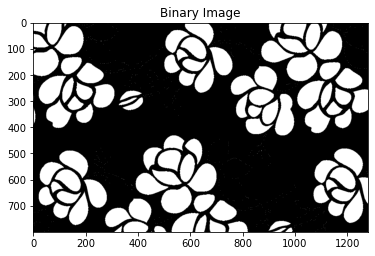

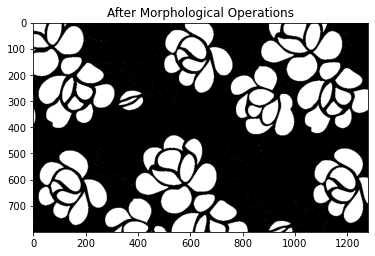

Total connected regions including background: 630


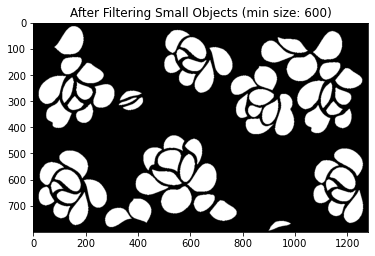

The number of items after the filter: 72


72

In [2]:
image_path = 'Leaves.png'  
seg(image_path, 0,600,1,135)

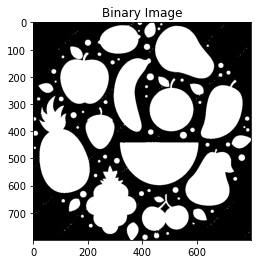

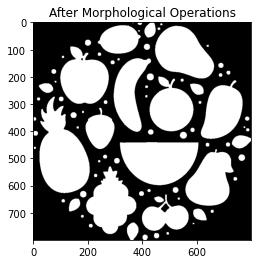

Total connected regions including background: 79


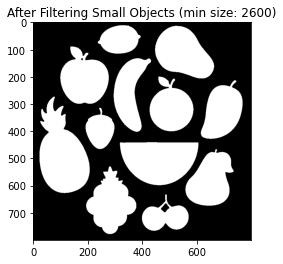

The number of items after the filter: 12


12

In [3]:
image_path = 'Fruits.jpg'  
seg(image_path, 245,2600,5)

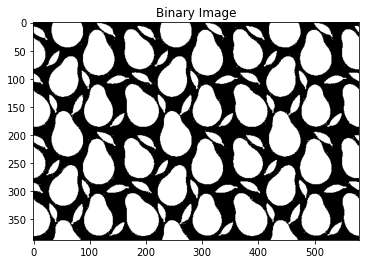

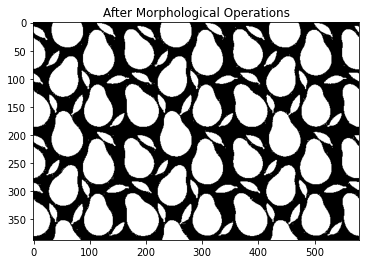

Total connected regions including background: 208


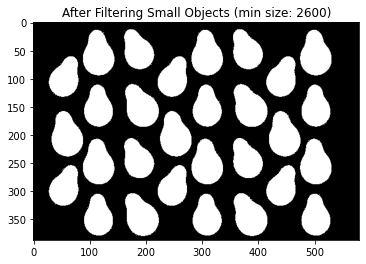

The number of items after the filter: 29


29

In [6]:
image_path = 'Avocados.jpg'  
seg(image_path, 241,2600,1)